In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

import seaborn as sns
%matplotlib inline

In [2]:
corr = '3d'

resultpath = os.path.join('results', corr)
imgpath = os.path.join('img', corr)

if not os.path.isdir(imgpath):
    os.makedirs(imgpath)
    

data = pd.read_csv(os.path.join(resultpath, 'result10p.txt'), sep=' ', index_col=0)
print 'Cases computed:', str(len(data))

Cases computed: 80


In [3]:
#data.head()

There are no occurences where the **representative periods lead to a feasible solution** and the full year representation does not

In [4]:
data[(~data['E_backup_repr'].isnull() & data['E_backup_full'].isnull())]

,A,V,P,E_backup_full,E_backup_repr,E_loss_stor_full,E_loss_stor_repr,E_curt_full,E_curt_repr,E_sol_full,E_sol_repr,t_repr
15,80000.0,50000.0,3600000.0,NaN,1.144154e+07,NaN,698003.632097,NaN,1.449795e+07,NaN,1.139392e+07,3.954


There are two cases where the **representative periods lead to an infeasible solution** and the full year is feasible

In [5]:
print 'Infeasible solutions:', str(len(data[(data['E_backup_repr'].isnull() & ~data['E_backup_full'].isnull())]))
data[(data['E_backup_repr'].isnull() & ~data['E_backup_full'].isnull())]

Infeasible solutions: 0


,A,V,P,E_backup_full,E_backup_repr,E_loss_stor_full,E_loss_stor_repr,E_curt_full,E_curt_repr,E_sol_full,E_sol_repr,t_repr


Cases where both are infeasible

In [6]:
print 'Infeasible solutions:', str(len(data[(data['E_backup_repr'].isnull() & data['E_backup_full'].isnull())]))
data[(data['E_backup_repr'].isnull() & data['E_backup_full'].isnull())]

Infeasible solutions: 7


,A,V,P,E_backup_full,E_backup_repr,E_loss_stor_full,E_loss_stor_repr,E_curt_full,E_curt_repr,E_sol_full,E_sol_repr,t_repr
0,20000.0,50000.0,3600000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.134
1,20000.0,50000.0,3850000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.247
2,20000.0,50000.0,4100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.638
5,40000.0,50000.0,3600000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.909
6,40000.0,50000.0,3850000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.033
10,60000.0,50000.0,3600000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.047
20,20000.0,75000.0,3600000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.121


In [7]:
data = data.dropna()
#data

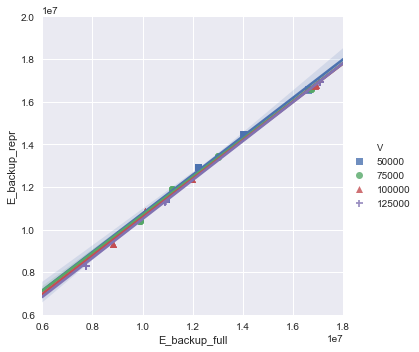

In [13]:
resultname = 'backup'
fullname = 'E_{}_full'.format(resultname)
reprname = 'E_{}_repr'.format(resultname)
g = sns.lmplot(fullname, reprname, data, hue='V', hue_order=[50000, 75000, 100000, 125000], 
               markers=['s', 'o', '^', '+'], fit_reg=True)

In [14]:
import numpy as np

sns.set_context("notebook")

import matplotlib.patches as mpatches



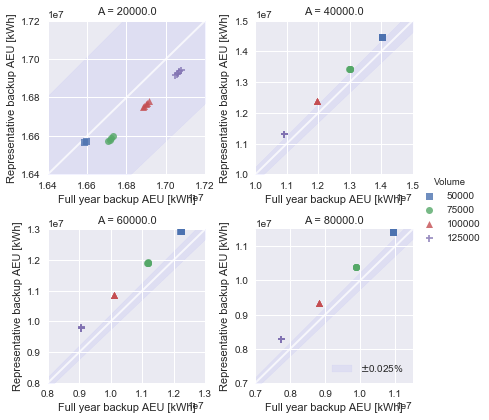

In [15]:
resultname = 'backup'
fullname = 'E_{}_full'.format(resultname)
reprname = 'E_{}_repr'.format(resultname)

dataname_no_ext = 'result8p'

g = sns.lmplot(x=fullname, y=reprname, data=data, fit_reg=False, hue='V', col='A', col_wrap=2, size=3, sharex=False,
               sharey=False, legend=False, markers=['s', 'o', '^', '+'], hue_order=[50000, 75000, 100000, 125000])
acc = 0.025

for axnum, ax in enumerate(g.axes):
    limmin = np.min([ax.get_xlim(), ax.get_ylim()])
    limmax = np.max([ax.get_xlim(), ax.get_ylim()])
    
    ax.set_xlim(limmin, limmax)
    ax.set_ylim(limmin, limmax)
    
    ax.set_xlabel('Full year {} AEU [kWh]'.format(resultname))
    ax.set_ylabel('Representative {} AEU [kWh]'.format(resultname))
    
    #
    # now plot both limits against eachother
    g.axes[axnum].plot([limmin, limmax], [limmin, limmax], 'w-',linewidth=2, alpha=0.75, zorder=0)
    z = g.axes[axnum].fill_between([limmin, limmax], [(1-acc)*limmin, (1-acc)*limmax], [(1+acc)*limmin, (1+acc)*limmax], zorder=-1, alpha=0.05, color='b', label='$\pm$'+str(100*acc)+'%')

plt.sca(g.axes[0])
g.add_legend(title='Volume')
g.axes[-1].legend([z], ['$\pm$'+ str(acc)+'%'], loc='lower right')
plt.savefig(os.path.join(imgpath,'E_{}_{}.png'.format(dataname_no_ext, resultname)), dpi=600)

In [96]:
for ax in g.axes:
    ax.plot([1.4e7, 2.3e7],[1.4e7, 2.3e7], linestyle=':',linewidth=0.5)

In [22]:
data[(data['A']==60000) & (data['V']==50000)]

,A,V,P,E_backup_full,E_backup_repr,E_loss_stor_full,E_loss_stor_repr,E_curt_full,E_curt_repr,E_sol_full,E_sol_repr,t_repr
13,60000.0,50000.0,4350000.0,1.781114e+07,1.746355e+07,718607.754296,712735.737217,1.035479e+06,1.092615e+06,6.328343e+06,6.356238e+06,4.247
14,60000.0,50000.0,4600000.0,1.780273e+07,1.745946e+07,710626.079868,708851.273946,1.035479e+06,1.092623e+06,6.328343e+06,6.356230e+06,5.737


In [ ]:
for ax in g.axes:
    ax.plot([1.4e7, 2.3e7],[1.4e7, 2.3e7], linestyle=':',linewidth=0.5, ax=ax)

In [65]:
data_split = pd.melt(data, id_vars=['A', 'P', 'V'], value_vars=['Representative', 'Full year'],
                    var_name='Optimization', value_name='Energy')
data_split

,A,P,V,Optimization,Energy
0,20000.0,4600000.0,50000.0,Representative,2.208824e+07
1,40000.0,4600000.0,50000.0,Representative,1.968946e+07
2,60000.0,4600000.0,50000.0,Representative,1.813814e+07
3,80000.0,4600000.0,50000.0,Representative,1.752686e+07
4,20000.0,4100000.0,75000.0,Representative,2.233528e+07
5,20000.0,4350000.0,75000.0,Representative,2.231649e+07
6,20000.0,4600000.0,75000.0,Representative,2.229975e+07
7,40000.0,4100000.0,75000.0,Representative,1.992478e+07
8,40000.0,4350000.0,75000.0,Representative,1.991050e+07
9,40000.0,4600000.0,75000.0,Representative,1.989815e+07


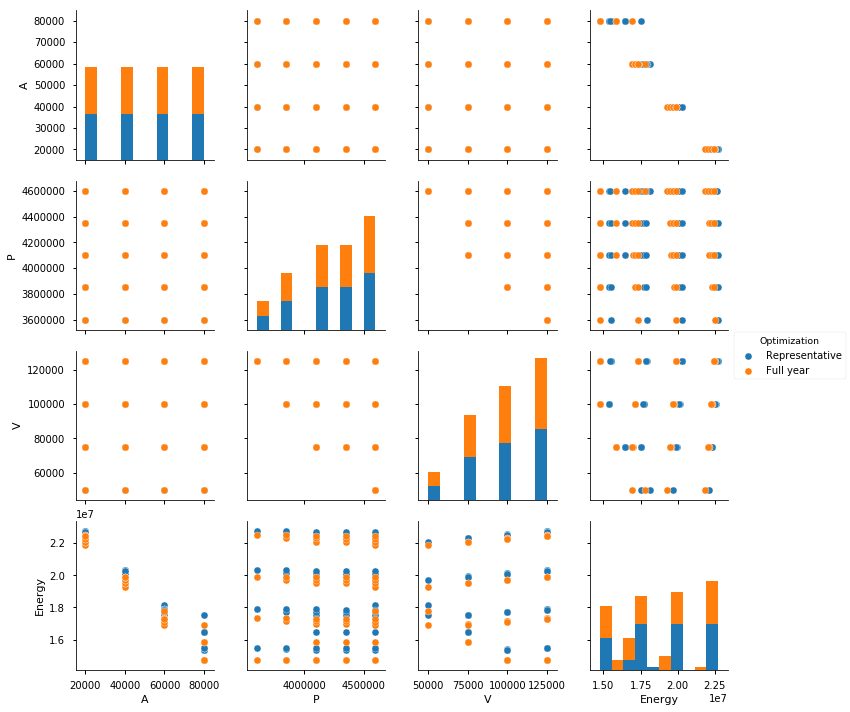

In [66]:
sns.pairplot(data_split, hue='Optimization')

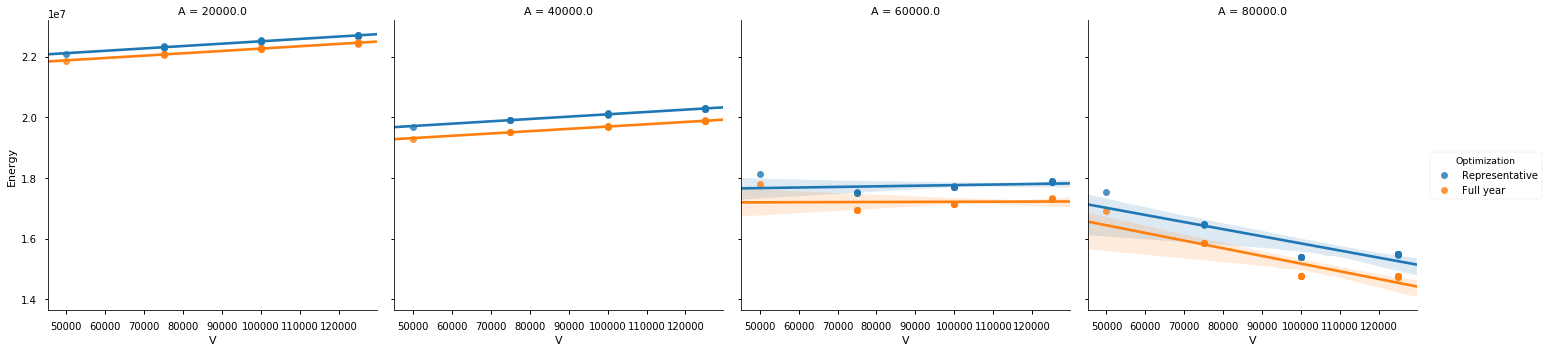

In [68]:
sns.lmplot(x='V', y='Energy', data=data_split, col='A', hue='Optimization')